In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm,tqdm_notebook
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import warnings
warnings.filterwarnings("ignore")
import math
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
from tqdm import tqdm,tqdm_notebook
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text Libs..
import re
from gensim import corpora, models
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.stem.porter import *
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# DL Libs..

CWD is  /home/ec2-user/IS434


In [3]:
df_train = pd.read_csv('train.tsv', '\t')
df_train = df_train.iloc[0:250000]
df_train_split ,df_test_split = train_test_split(df_train,test_size = 0.25)

# Missing Data

After conducting an EDA on our dataset, we observed that name and category_name has missing data.  
We will feel the missing data with "Missing"

In [4]:
def fill_missing_data(data):
    data.brand_name.fillna(value = "Missing", inplace = True)
    data.category_name.fillna(value = "Missing", inplace = True)

fill_missing_data(df_train_split)
fill_missing_data(df_test_split)

# Remove outliers in Price Column

In [5]:
df_train_split[df_train_split["price"] < 3].count()

train_id             92
name                 92
item_condition_id    92
category_name        92
brand_name           92
price                92
shipping             92
item_description     92
dtype: int64

In [6]:
df_train_split[df_train_split["price"] > 2000].count()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [7]:
df_train_split = df_train_split[(df_train_split.price >= 3)]
df_test_split = df_test_split[(df_test_split.price >= 3)]

Log(Price)

In [8]:
df_train_split['log_price'] = np.log1p(df_train_split['price'])
df_test_split['log_price'] = np.log1p(df_test_split['price'])

# Tokenize

## Category_name column

In [9]:
cat_unique = pd.Series("/".join(df_train_split["category_name"].unique().astype("str")).split("/")).unique()

In [10]:
print(len(cat_unique))

839


In [11]:
CV_category = CountVectorizer(vocabulary = cat_unique ,lowercase = False, binary = True)

In [12]:
CV_category.fit(df_train_split["category_name"])
df_train_transform = CV_category.transform(df_train_split["category_name"])
df_test_transform = CV_category.transform(df_test_split['category_name'])

#creates a matrix in which each unique word is represented by a column of the matrix,
#and each text sample from the document is a row in the matrix. 
#The value of each cell is nothing but the count of the word in that particular text sample. 
print(df_train_transform.shape, df_test_transform.shape)

(187408, 839) (62463, 839)


In [13]:
CV_category.get_feature_names()

['Kids',
 'Toys',
 'Games',
 'Women',
 "Women's Handbags",
 'Shoulder Bag',
 'Tops & Blouses',
 'Tank, Cami',
 'Shoes',
 'Pumps',
 'Electronics',
 'Cell Phones & Accessories',
 'Cases, Covers & Skins',
 'Knit Top',
 'Beauty',
 'Tools & Accessories',
 'Hair Styling Tools',
 'Feeding',
 'Pacifiers & Accessories',
 'Jeans',
 'Boot Cut',
 'Media',
 'DVD',
 'Totes & Shoppers',
 'Fragrance',
 'Jewelry',
 'Rings',
 'Sweaters',
 'Hooded',
 'Handmade',
 'Children',
 'Toy',
 'Dresses',
 'Knee-Length',
 'Men',
 'Fashion Sneakers',
 'Makeup',
 'Lips',
 'Sports & Outdoors',
 'Exercise',
 'Yoga & Pilates',
 'Face',
 'Underwear',
 'Bras',
 'Full Zip',
 'Athletic Apparel',
 'Pants, Tights, Leggings',
 'Skin Care',
 'Eyes',
 'Boots',
 'Makeup Sets',
 'Sandals',
 'Other',
 'Halter',
 'Crewneck',
 'Coats & Jackets',
 'Fleece Jacket',
 'Backpack Style',
 'Girls 2T-5T',
 'Car Audio, Video & GPS',
 'Car Video',
 'Swimwear',
 'Two-Piece',
 "Men's Accessories",
 'Belts',
 'Vintage & Collectibles',
 'Collectib

In [14]:
df_train_transform.toarray()

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
CV_category.vocabulary_

{'Kids': 0,
 'Toys': 1,
 'Games': 2,
 'Women': 3,
 "Women's Handbags": 4,
 'Shoulder Bag': 5,
 'Tops & Blouses': 6,
 'Tank, Cami': 7,
 'Shoes': 8,
 'Pumps': 9,
 'Electronics': 10,
 'Cell Phones & Accessories': 11,
 'Cases, Covers & Skins': 12,
 'Knit Top': 13,
 'Beauty': 14,
 'Tools & Accessories': 15,
 'Hair Styling Tools': 16,
 'Feeding': 17,
 'Pacifiers & Accessories': 18,
 'Jeans': 19,
 'Boot Cut': 20,
 'Media': 21,
 'DVD': 22,
 'Totes & Shoppers': 23,
 'Fragrance': 24,
 'Jewelry': 25,
 'Rings': 26,
 'Sweaters': 27,
 'Hooded': 28,
 'Handmade': 29,
 'Children': 30,
 'Toy': 31,
 'Dresses': 32,
 'Knee-Length': 33,
 'Men': 34,
 'Fashion Sneakers': 35,
 'Makeup': 36,
 'Lips': 37,
 'Sports & Outdoors': 38,
 'Exercise': 39,
 'Yoga & Pilates': 40,
 'Face': 41,
 'Underwear': 42,
 'Bras': 43,
 'Full Zip': 44,
 'Athletic Apparel': 45,
 'Pants, Tights, Leggings': 46,
 'Skin Care': 47,
 'Eyes': 48,
 'Boots': 49,
 'Makeup Sets': 50,
 'Sandals': 51,
 'Other': 52,
 'Halter': 53,
 'Crewneck': 54,
 

Truncated SVD for feature importance

What is SVD?
SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

It helps with dimensionality reduction.



In [16]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=1)
svd.fit(df_train_transform)

TruncatedSVD(n_components=100, n_iter=1)

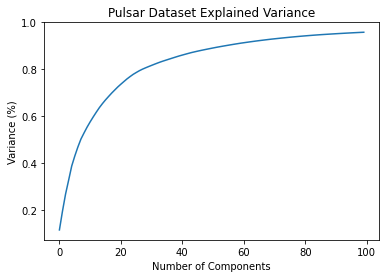

In [17]:
plt.figure()
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

with K = 80, we get an explained variance above 90%(?).Hence, 80 features or words explain 90% of our data.

We can just use these top components as our features.

## Name column

In [18]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['name'].values) 


# train_name = vectorizer.transform(df_train_split['name'].values)
# test_name = vectorizer.transform(df_test_split['name'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [19]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
stop_words = stopwords.words('english')

def preprocess(sentence):
    sentence=str(sentence)
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stop_words]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)

df_train_split['name_process']=df_train_split['name'].map(lambda s:preprocess(s))
df_test_split['name_process']=df_test_split['name'].map(lambda s:preprocess(s))


In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(df_train_split['name_process'].values) 


train_name = vectorizer.transform(df_train_split['name_process'].values)
test_name = vectorizer.transform(df_test_split['name_process'].values)

print("After vectorizations")
print(train_name.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(187408, 4947)
['aaron', 'abalon', 'abbey', 'abc', 'abercrombi', 'abh', 'about', 'abov', 'absolut', 'abstract', 'acacia', 'accent', 'access', 'accessori', 'ace', 'acid', 'acn', 'acoust', 'acqua', 'acryl', 'act', 'action', 'activ', 'adam', 'adapt', 'add', 'addict', 'addida', 'adelin', 'aden', 'adhes', 'adida', 'adjust', 'ador', 'adult', 'advanc', 'adventur', 'advocar', 'aeo', 'aeri', 'aero', 'aeropostal', 'aerosol', 'afflict', 'african', 'after', 'against', 'agat', 'agd', 'age', 'ageless', 'agenda', 'agn', 'aid', 'air', 'airbrush', 'airmax', 'airplan', 'airspun', 'alabama', 'aladdin', 'alarm', 'album', 'alcatel', 'aldo', 'alex', 'alexa', 'alexand', 'alexandra', 'alexi', 'ali', 'alic', 'alicia', 'alien', 'align', 'alik', 'aliv', 'all', 'allen', 'alli', 'allison', 'almay', 'almond', 'almost', 'alo', 'aloha', 'alpha', 'alphabet', 'alta', 'altar', 'altern', 'aluminum', 'alway', 'alyssa', 'amanda', 'amaz', 'amazon', 'amazonian', 'amber', 'ambient', 'amelia', 'america', '

# Item Description

In [22]:
# function to decontract phrases
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def text_process(text):
    stop_words = stopwords.words('english')
    processed = []
    desc_length_tokenized = []
    for sentence in tqdm_notebook(text):
        sentence_decontracted = decontracted(sentence)
        sentence_decontracted = sentence_decontracted.replace('\\"', ' ')
        sentence_decontracted = sentence_decontracted.replace('\\`', ' ')
        sentence_decontracted = re.sub(r"[^0-9a-zA-Z]+", ' ', sentence_decontracted)
        text_tokens = word_tokenize(sentence_decontracted)
        desc_length_tokenized.append(len(text_tokens))
        joined_words = " ".join(word for word in text_tokens if word not in stop_words)
        processed.append(joined_words)
    return processed, desc_length_tokenized

In [23]:
df_train_split['item_description'] = df_train_split['item_description'].replace([np.nan],"No Description")
df_test_split['item_description'] = df_test_split['item_description'].replace([np.nan],"No Description")

In [24]:
df_train_split['item_desc_processed'], df_train_split['item_desc_length_tokenized'] = text_process(df_train_split['item_description'])
df_test_split['item_desc_processed'], df_test_split['item_desc_length_tokenized'] = text_process(df_test_split['item_description'])

In [25]:
df_train_split['item_desc_processed_2']=df_train_split['item_description'].map(lambda s:preprocess(s))
df_test_split['item_desc_processed_2']=df_test_split['item_description'].map(lambda s:preprocess(s))

In [26]:
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(df_train_split['item_desc_processed_2'].values) 


# train_name = vectorizer.transform(df_train_split['item_desc_processed_2'].values)
# test_name = vectorizer.transform(df_test_split['item_desc_processed_2'].values)

# print("After vectorizations")
# print(train_name.shape)

# print(vectorizer.get_feature_names())
# print("="*100)

In [27]:
def tokenizer(text):
    if text:
        result = re.findall('[a-z]{2,}', text.lower())
    else:
        result = []
    return result

tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_df = 0.5, max_features=5000, use_idf=True) 
tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed_2'])
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(df_test_split['item_desc_processed_2'])


In [28]:
print(tfidf_vectorizer_vectors_train.shape)
print(tfidf_vectorizer_vectors_test.shape)

(187408, 5000)
(62463, 5000)


In [29]:
print(tfidf_vectorizer.get_feature_names())

['abercrombi', 'abercrombi fitch', 'abh', 'abl', 'about', 'absolut', 'absorb', 'accent', 'accept', 'accept offer', 'access', 'accessori', 'accident', 'accord', 'account', 'accur', 'achiev', 'acid', 'acn', 'across', 'acryl', 'action', 'activ', 'activ charcoal', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addit item', 'address', 'adhes', 'adhes seal', 'adida', 'adjust', 'adjust strap', 'ador', 'adult', 'advanc', 'advantag', 'adventur', 'aeropostal', 'affect', 'afford', 'african', 'after', 'after purchas', 'age', 'ago', 'agre', 'air', 'air dri', 'air ipad', 'air jordan', 'air max', 'album', 'alex', 'alex ani', 'all', 'all black', 'all brand', 'all brand new', 'all free', 'all good', 'all good condit', 'all great', 'all great condit', 'all item', 'all item brand', 'all item come', 'all item ship', 'all new', 'all order', 'all order ship', 'all price', 'all product', 'all sale', 'all sale final', 'all size', 'allow', 'alloy', 'almond', 'almost', 'almost new', 'alo', 'aloha', 'alon',

## Sentiment of item description

In [30]:
def generate_sentiment_scores(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in tqdm_notebook(sentences): 
        sentence_sentiment_score = analyzer.polarity_scores(sentence)
        results.append(sentence_sentiment_score)
    return results

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
train_senti_desc = generate_sentiment_scores(df_train_split['item_description'])
test_senti_desc = generate_sentiment_scores(df_test_split['item_description'])

In [33]:
def get_sentiments(dataframe, array):
    negative, neutral, compound, positive = [], [], [], []
    for sentiment_dict in array:
        for sentiment, score in sentiment_dict.items():
            if(sentiment=='neg'):
                negative.append(score)
            elif(sentiment=='neu'):
                neutral.append(score)
            elif(sentiment=='compound'):
                compound.append(score)
            elif(sentiment=='pos'):
                positive.append(score)
    dataframe['negative'] = negative
    dataframe['positive'] = positive
    dataframe['neutral'] = neutral
    dataframe['compound'] = compound

In [34]:
get_sentiments(df_train_split,train_senti_desc)
get_sentiments(df_test_split,test_senti_desc)

In [35]:
def get_description_features(dataframe, sentence_df):
    percentage_of_exclamation_marks, percentage_of_star, percentage_of_ampersand, percentage_of_hashtag = [], [], [], []
    for description in sentence_df:
        hashtag_regex = re.compile(r'(#[a-z]{2,})')
        percentage_of_exclamation_marks.append(description.count('!')/len(description) * 100)
        percentage_of_star.append(description.count("*")/len(description)*100)
        percentage_of_ampersand.append(description.count("%")/len(description)*100)
        percentage_of_hashtag.append(len(hashtag_regex.findall(description))/len(description)*100)
    dataframe['percentage_of_exclamation_marks'] = percentage_of_exclamation_marks
    dataframe['percentage_of_star'] = percentage_of_star
    dataframe['percentage_of_ampersand'] = percentage_of_ampersand
    dataframe['percentage_of_hashtag'] = percentage_of_hashtag

In [36]:
get_description_features(df_train_split,df_train_split['item_description'])
get_description_features(df_test_split,df_test_split['item_description'])

Vectorize item description

In [37]:
# tfidf_vectorizer=TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,3), min_df = 10, max_features=5000, use_idf=True) 
# tfidf_vectorizer_vectors_train = tfidf_vectorizer.fit_transform(df_train_split['item_desc_processed'])
# tfidf_vectorizer_vectors_test =tfidf_vectorizer.transform(df_test_split['item_desc_processed'])

In [38]:
new = pd.DataFrame.sparse.from_spmatrix(data = tfidf_vectorizer_vectors_train, columns= tfidf_vectorizer.get_feature_names())

In [39]:
new

,abercrombi,abercrombi fitch,abh,abl,about,absolut,absorb,accent,accept,accept offer,...,zip closur,zip hoodi,zip pocket,zipper,zipper back,zipper closur,zipper pocket,zipper work,zirconia,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cat Brand Shipping

In [40]:
def generate_cbs_stats(train_data, test_data_to_transform):
    df_group_cat_brand_shipping = train_data.groupby('cat_brand_ship',as_index = False).agg({"shipping" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group_cat_brand_shipping.columns = ['cat_brand_ship','cat_brand_shipping_count','cat_brand_shipping_log_price_median','cat_brand_shipping_log_price_mean','cat_brand_shipping_log_price_std',
                    'cat_brand_shipping_log_price_min','cat_brand_shipping_log_price_max']

    df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'].fillna(0)
    df_group_cat_brand_shipping['cat_brand_shipping_log_price_conf_variance'] = df_group_cat_brand_shipping['cat_brand_shipping_log_price_std'] / df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean']
    df_group_cat_brand_shipping['cat_brand_shipping_log_count'] = np.log1p(df_group_cat_brand_shipping['cat_brand_shipping_count'])
    df_group_cat_brand_shipping['cat_brand_shipping_min_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] - (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2)).clip(lower=1.0)
    df_group_cat_brand_shipping['cat_brand_shipping_max_expected_log_price'] = (df_group_cat_brand_shipping['cat_brand_shipping_log_price_mean'] + (df_group_cat_brand_shipping['cat_brand_shipping_log_price_std']*2))
    
    df_group_stats_train = train_data.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    df_group_stats_test = test_data_to_transform.merge(df_group_cat_brand_shipping.reset_index(),
                                      how = 'left',
                                      on = 'cat_brand_ship')[['cat_brand_shipping_log_count',
                                                              'cat_brand_shipping_log_price_std',
                                                              'cat_brand_shipping_log_price_conf_variance',
                                                              'cat_brand_shipping_min_expected_log_price',
                                                              'cat_brand_shipping_max_expected_log_price',
                                                              'cat_brand_shipping_log_price_min',
                                                              'cat_brand_shipping_log_price_max']].fillna(0).values
    scaler = StandardScaler(copy=True)
    cat_brand_shipping_feats_scaled_train = scaler.fit_transform(df_group_stats_train)
    cat_brand_shipping_fit = scaler.fit(df_group_stats_train)
    #fit with training, then transform test data using train data mean and SD
    cat_brand_shipping_feats_scaled_test = scaler.transform(df_group_stats_test)

    return cat_brand_shipping_feats_scaled_train, cat_brand_shipping_feats_scaled_test

In [41]:
df_train_split['cat_brand_ship'] = (df_train_split['category_name'].astype(str) + "_" + 
                                    df_train_split['brand_name'].astype(str) + "_" +  
                                    df_train_split['shipping'].astype(str))

df_test_split['cat_brand_ship'] = (df_test_split['category_name'].astype(str) + "_" + 
                                    df_test_split['brand_name'].astype(str) + "_" +  
                                    df_test_split['shipping'].astype(str))

In [42]:
train_cbs_feats, test_cbs_feats = generate_cbs_stats(df_train_split,df_test_split)

In [43]:
train_cbs_feats.shape
test_cbs_feats.shape

(62463, 7)

In [44]:
stats_train = pd.DataFrame(train_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

stats_test = pd.DataFrame(test_cbs_feats,columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max'])

#  Item condition + Shipping Dummies

In [45]:
#itemcondition and shipping, create dummy variables
item_shipping_dummies_train = scipy.sparse.csr_matrix(pd.get_dummies(df_train_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)
item_shipping_dummies_test = scipy.sparse.csr_matrix(pd.get_dummies(df_test_split[['item_condition_id', 'shipping']],
                                      sparse=True).values)

# Brand Name

In [46]:
df_train_split['brand_name'] = df_train_split['brand_name'].replace([np.nan],"No Brand Name")
df_test_split['brand_name'] = df_test_split['brand_name'].replace([np.nan],"No Brand Name")

In [47]:
#Label Binarizer 
# It assigns a unique value or number to each label in a categorical feature.
# It encodes categorical integer features as a one-hot numeric array. 
#It makes model training easier and faster.
#it encodes the data into dummy variables 
#indicating the presence of a particular label or not
lb = LabelBinarizer(sparse_output=True)
fitting_brand_name = lb.fit(df_train_split['brand_name'])
X_brand_train = lb.transform(df_train_split['brand_name'])
X_brand_test = lb.transform(df_test_split['brand_name'])

In [48]:
X_brand_test.shape

(62463, 2585)

In [49]:
print(df_train_split['brand_name'][:10])

45833             Missing
63664     Banana Republic
168033           Studio Y
123275            Missing
162795            Missing
51476             LuLaRoe
62160                Ulta
247272            Missing
92646             Miss Me
158459            Missing
Name: brand_name, dtype: object


In [50]:
print(X_brand_train[:10])

  (0, 1550)	1
  (1, 247)	1
  (2, 2194)	1
  (3, 1550)	1
  (4, 1550)	1
  (5, 1388)	1
  (6, 2366)	1
  (7, 1550)	1
  (8, 1548)	1
  (9, 1550)	1


In [51]:
df_corr = pd.concat([pd.DataFrame(df_train_split,
                                  columns = ['item_desc_length_tokenized','negative', 'neutral', 'compound', 'positive','percentage_of_exclamation_marks', 'percentage_of_star', 'percentage_of_ampersand', 'percentage_of_hashtag']),
                    pd.DataFrame(train_cbs_feats,
                                  columns = ['cbs_log_count','cbs_log_price_std',
                                             'cbs_log_price_conf_variance','cbs_min_expected_log_price',
                                             'cbs_max_expected_log_price','cbs_log_price_min','cbs_log_price_max']),
                    df_train_split['log_price'].reset_index(drop = True)],axis = 1)

In [52]:
#df_corr = pd.concat([df_train_split['log_price'].reset_index(drop = True)],axis = 1)

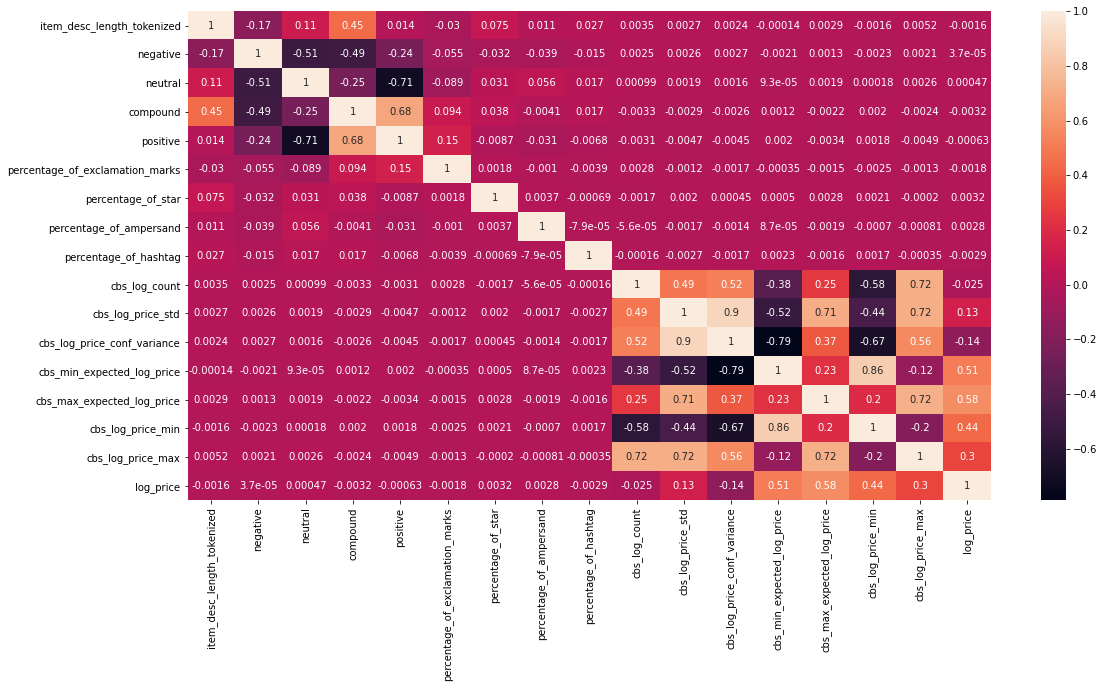

In [53]:
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Percentage of hashtag, Percentage of ampersand, Percentage of star, Percentage of exclamation marks
has a low correlation with log price and thus we are dropping.



# X_train and X_test

In [54]:
X_train = scipy.sparse.hstack((train_cbs_feats,
                               X_brand_train,
                               df_train_transform,
                               tfidf_vectorizer_vectors_train,
                               item_shipping_dummies_train,
                               train_name,
                               np.array(df_train_split['negative'])[:,None],
                               np.array(df_train_split['neutral'])[:,None],
                               np.array(df_train_split['compound'])[:,None],
                               np.array(df_train_split['positive'])[:,None]
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((test_cbs_feats,
                               X_brand_test,
                              df_test_transform,
                              tfidf_vectorizer_vectors_test,
                              item_shipping_dummies_test,
                              test_name,
                              np.array(df_test_split['negative'])[:,None],
                              np.array(df_test_split['neutral'])[:,None],
                              np.array(df_test_split['compound'])[:,None],
                              np.array(df_test_split['positive'])[:,None]
                              )).tocsr().astype('float32')

y_train = df_train_split['log_price']
y_test = df_test_split['log_price']

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)

X_train Shape is  (187408, 13384)
X_test Shape is  (62463, 13384)
y_train Shape is  (187408,)
y_test Shape is  (62463,)


In [55]:
print(train_cbs_feats.shape, test_cbs_feats.shape)
print(X_brand_train.shape, X_brand_test.shape)
print(df_train_transform.shape, df_test_transform.shape)
print(tfidf_vectorizer_vectors_train.shape, tfidf_vectorizer_vectors_test.shape)
print(train_name.shape, test_name.shape)

(187408, 7) (62463, 7)
(187408, 2585) (62463, 2585)
(187408, 839) (62463, 839)
(187408, 5000) (62463, 5000)
(187408, 4947) (62463, 4947)


In [56]:
from scipy import sparse
import pandas as pd
# Uncomment out to save for the first time. Subsequent times only need to load
sparse.save_npz("X_train.npz", X_train)
sparse.save_npz("X_test.npz", X_test)
y_train.to_pickle("y_train")
y_test.to_pickle("y_test")


#Keep uncommented to load. 
X_train = sparse.load_npz("X_train.npz")
X_test = sparse.load_npz("X_test.npz")

y_train = pd.read_pickle("y_train")
y_test = pd.read_pickle("y_test")
y_test = pd.read_pickle("y_test")

## KNN 

In [64]:
#Create the kNN Regressor and set the number of neighbors to be 3
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train) 


KNeighborsRegressor(n_neighbors=3)

In [65]:
knn_y_pred_train = knn_regressor.predict(X_train)
knn_y_pred_test = knn_regressor.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, knn_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, knn_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, knn_y_pred_train)))
print('Train R^2:',r2_score(y_train, knn_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, knn_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred_test)))
print('Test R^2:',r2_score(y_test, knn_y_pred_test))

Train Mean Absolute Error: 0.27997290509715617
Train Mean Squared Error: 0.1491804625654886
Train Root Mean Squared Error: 0.3862388672382527
Train R^2: 0.7310902234195602
------------------------------
Test Mean Absolute Error: 0.4963121882934578
Test Mean Squared Error: 0.49026213976020666
Test Root Mean Squared Error: 0.7001872176498273
Test R^2: 0.11785260532275632


## Lasso 

In [70]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [71]:
lasso_y_pred_train = reg_lasso.predict(X_train)
lasso_y_pred_test = reg_lasso.predict(X_test)

print('Train Mean Absolute Error:', metrics.mean_absolute_error(y_train, lasso_y_pred_train))
print('Train Mean Squared Error:', metrics.mean_squared_error(y_train, lasso_y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lasso_y_pred_train)))
print('Train R^2:',r2_score(y_train, lasso_y_pred_train))
print("------------------------------")
print('Test Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_y_pred_test))
print('Test Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_y_pred_test)))
print('Test R^2:',r2_score(y_test, lasso_y_pred_test))

Train Mean Absolute Error: 0.4155811982089742
Train Mean Squared Error: 0.3019294405932952
Train Root Mean Squared Error: 0.5494810648177926
Train R^2: 0.455747910840819
------------------------------
Test Mean Absolute Error: 0.558356001975572
Test Mean Squared Error: 0.6548040649522588
Test Root Mean Squared Error: 0.8091996446812485
Test R^2: -0.178213965704616
